In this Notebook, we are going to analyze the factors that contribute happiness. Which of the factors above contribute the most to the happiness score?

Economy (GDP per Capita)

Family

Health (Life Expectancy)

Freedom

Trust (Government Corruption)

Generosity

I am going to explore teh usage of: Series.map(), Series.apply(), DataFrame.applymap(), DataFrame.apply(), pd.melt() in order to answer above question.

In [ ]:
import pandas as pd # import pandas package
import numpy as np

# show the plots inside the notebook
%matplotlib inline


In [ ]:
happiness2015 = pd.read_csv('/content/drive/MyDrive/dataquest/data-cleaning &Visualization/world_happiness-2015.csv') # read the data set
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:

###First, we need to rename some columns in the dataset following below dictionary mapping.

mapping = {'Economy (GDP per Capita)': 'Economy', 
           'Health (Life Expectancy)': 'Health', 
           'Trust (Government Corruption)': 'Trust' }

happiness2015 = happiness2015.rename(mapping, axis = 1) # rename multi-columns using a dictionary

In [ ]:
# show the list of columns' names
happiness2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [ ]:
# let's take a look on the values in each column
happiness2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


It's a little difficult to work with a range of random numbers. It will be better if we can translate these numbers to categories. Let's try with column Economy. We want to translate number which are lower than 1 to Low (affect) and otherwise to High (affect).

In [ ]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

economy_impact_map = happiness2015['Economy'].map(label)
economy_impact_apply = happiness2015['Economy'].apply(label)
equal = economy_impact_map.equals(economy_impact_apply) # check if they are the same?

display(equal)

True

In [ ]:
# take a look on first 10 values
economy_impact_apply[:10]

0    High
1    High
2    High
3    High
4    High
5    High
6    High
7    High
8    High
9    High
Name: Economy, dtype: object

You can either assign the results back to the original column or create a new column. We recommend creating a new column.

In [ ]:
happiness2015['Economy Impact'] = happiness2015['Economy'].map(label)

In [ ]:

happiness2015.head() # look on the last column

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Economy Impact
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,High
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,High
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,High
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,High
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,High


In [ ]:
#Can we change the number of 1 in the label function above?
def label_x(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'

In [ ]:
# try with `map`
economy_map = happiness2015['Economy'].map(label_x, x = .8)

TypeError: ignored

In [ ]:

# we CAN'T work with `map` in this case
# let's try with `apply`
economy_map = happiness2015['Economy'].apply(label_x, x = .8)

In [ ]:
economy_map

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object

if you wanna apply a transform function with custom arguments, you have to use .apply() instead of .map()!


Now, I want to  apply the same way to other impacts (Health, Family,...). You can use multiple lines to do these tasks. But we wanna apply 1 time for multi-columns.

Is there any way allowing us to do so?

Ans is yess-> It's time to use .applymap() method.

In [ ]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity'] # column name
factors_impact = happiness2015[factors].applymap(label) # apply 1 time for many columns

# let's have a look on first 5 rows of the result
factors_impact.head()

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low


In [ ]:
#According to our definition, the Economy and Family columns 
#had a high impact on the happiness scores of the first five countries. But they are good?

# we want to know how many each of `High` and `Low` in each column
factors_impact.apply(pd.value_counts)

,Economy,Family,Health,Freedom,Trust,Generosity
High,66,89,2,NaN,NaN,NaN
Low,92,69,156,158.0,158.0,158.0


In [ ]:

# can we use `apply` for multiple columns with an element-wise function like `label`? Let's try
happiness2015[factors].apply(label)

ValueError: ignored

The error indicates that, we CAN'T use .apply() with an element-wise function to multiple columns. In the case of using it with pd.value_counts, it works because pd.value_counts operates on a Series.

In [ ]:
#Calculates the percentage of High and Lowvalues in each column.


def percentage_counts(col):
    num = col.value_counts()#total no of counts i.e; 158
    den = col.size#no of values of hig/low for that particular column
    return num/den

value_counts_pct = factors_impact.apply(percentage_counts)
value_counts_pct

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,NaN,NaN,NaN
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0


In [ ]:
#Interesting: The sum of the six factors and the Dystopia Residual column equals the happiness score:

#Calculate the sum of the factor columns in each row.
happiness2015['Factors Sum'] = happiness2015[['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']].sum(axis=1)

#Display the first five rows of the result and the Happiness Score column.
happiness2015[['Happiness Score', 'Factors Sum']].head()

,Happiness Score,Factors Sum
0,7.587,7.58696
1,7.561,7.56092
2,7.527,7.52708
3,7.522,7.52222
4,7.427,7.42694


In [ ]:
#Because the sum of the seven columns equal the happiness score,
# we can convert them to percentages and analyze them as proportions of the happiness score instead.

factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

def percentages(col): # find the percentage of each column as a proportion of the happiness score
    div = col/happiness2015['Happiness Score'] 
    return div * 100

factor_percentages = happiness2015[factors].apply(percentages)
factor_percentages.head()


,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,18.406617,17.787136,12.408462,8.772506,5.532885,3.911691,33.180177
1,17.224177,18.545563,12.535908,8.315963,1.870784,5.770401,35.736146
2,17.609672,18.075993,11.620035,8.627342,6.424472,4.535539,33.108011
3,19.396437,17.694097,11.768280,8.903616,4.852832,4.613002,32.774661
4,17.857681,17.808132,12.193753,8.522553,4.437458,6.168170,33.011445


In [ ]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Economy Impact,Factors Sum
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,High,7.58696
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,High,7.56092
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,High,7.52708
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,High,7.52222
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,High,7.42694


Each country has 6 columns of 6 factors and 1 columns of Dystopia Residual. These 7 columns are considered as the main factors affecting much on the happiness scores. In order to work more easily with "these factors AS ONE", we would like to "reshape" our dataset into a new dataset in which there is a column containing the types of factors and a column containing their values. Let's use pd.melt() function to perform this idea.

In [ ]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score'] # columns will be kept (they are fix as ids)
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'] # columns will be melt
melt = pd.melt(happiness2015, id_vars = main_cols, value_vars = factors) # new dataset
melt.head()




,Country,Region,Happiness Rank,Happiness Score,variable,value
0,Switzerland,Western Europe,1,7.587,Economy,1.39651
1,Iceland,Western Europe,2,7.561,Economy,1.30232
2,Denmark,Western Europe,3,7.527,Economy,1.32548
3,Norway,Western Europe,4,7.522,Economy,1.45900
4,Canada,North America,5,7.427,Economy,1.32629


In [ ]:
melt.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'variable',
       'value'],
      dtype='object')

In [ ]:
melt['value'].unique()

array([1.39651, 1.30232, 1.32548, ..., 0.32858, 1.83302, 1.56726])

In [ ]:
melt.shape

(1106, 6)

In [ ]:
melt['variable'].unique()

array(['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity',
       'Dystopia Residual'], dtype=object)

###Now adding percentage to our new dataset

In [ ]:
melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2) # add a column of percentages

melt.head()

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61
3,Norway,Western Europe,4,7.522,Economy,1.45900,19.40
4,Canada,North America,5,7.427,Economy,1.32629,17.86


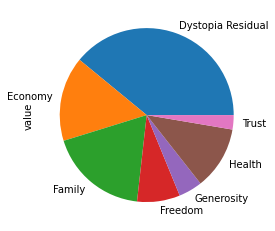

In [ ]:
pv_melt = melt.pivot_table(index='variable', values='value')
pv_melt.plot(kind='pie', y='value', legend=False)

If you wanna do an inverse task (un-melt data)? You can use df.pivot() method (it's different from df.pivot_table()). Below is an example,

In [ ]:
# Below codes are only for displaying multiple dataframes side-by-side, it's not a part of this lesson!
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [ ]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
...                            'two'],
...                    'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
...                    'baz': [1, 2, 3, 4, 5, 6],
...                    'zoo': ['x', 'y', 'z', 'q', 'w', 't']})

pivot_1 = df.pivot(index='foo', columns='bar', values='baz')
pivot_2 = df.pivot(index='foo', columns='bar')['baz']
pivot_3 = df.pivot(index='foo', columns='bar', values=['baz', 'zoo'])

display_side_by_side(df, pivot_1, pivot_2, pivot_3)

foo 
 bar 
 baz 
 zoo 
 
 
 
 
 0 
 one 
 A 
 1 
 x 
 
 
 1 
 one 
 B 
 2 
 y 
 
 
 2 
 one 
 C 
 3 
 z 
 
 
 3 
 two 
 A 
 4 
 q 
 
 
 4 
 two 
 B 
 5 
 w 
 
 
 5 
 two 
 C 
 6 
 t 
 
 
 
 
 
 bar 
 A 
 B 
 C 
 
 
 foo 
 
 
 
 
 
 
 
 one 
 1 
 2 
 3 
 
 
 two 
 4 
 5 
 6 
 
 
 
 
 
 bar 
 A 
 B 
 C 
 
 
 foo 
 
 
 
 
 
 
 
 one 
 1 
 2 
 3 
 
 
 two 
 4 
 5 
 6 
 
 
 
 
 
 
 baz 
 zoo 
 
 
 bar 
 A 
 B 
 C 
 A 
 B 
 C 
 
 
 foo 
 
 
 
 
 
 
 
 
 
 
 one 
 1 
 2 
 3 
 x 
 y 
 z 
 
 
 two 
 4 
 5 
 6 
 q 
 w 
 t

In [ ]:
df_melt = pd.melt(pivot_1, id_vars='A', value_vars=['B', 'C'])
display_side_by_side(pivot_1, df_melt)

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6
,A,bar,value
0,1,B,2
1,4,B,5
2,1,C,3
3,4,C,6


In [ ]:
pivot_1.reset_index(level=0, inplace=True)
pivot_1

bar,foo,A,B,C
0,one,1,2,3
1,two,4,5,6


In [ ]:
pivot_1['A']


0    1
1    4
Name: A, dtype: int64

In [ ]:
pivot_2.reset_index(inplace=True)
pivot_2

bar,foo,A,B,C
0,one,1,2,3
1,two,4,5,6
